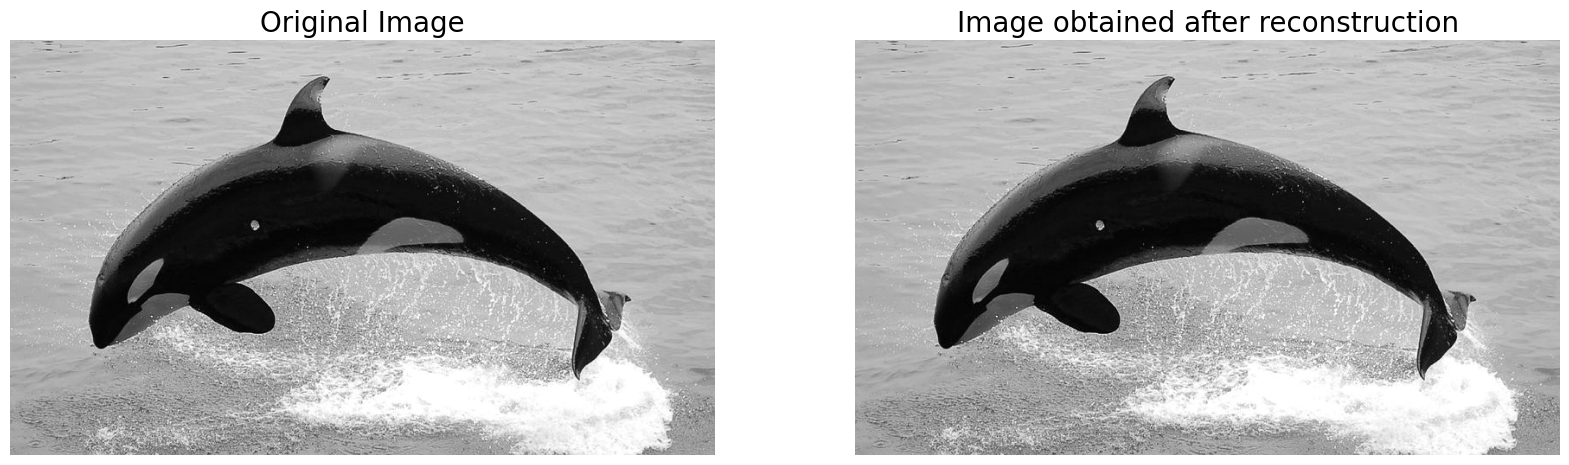

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack as fp
from PIL import Image
import os
import cv2

# Hàm tính SNR
def calculate_snr(image):
    mean_signal = np.mean(image)  # Tính giá trị trung bình
    noise = np.std(image)  # Tính độ lệch chuẩn (nhiễu)
    snr = mean_signal / noise  # Tính SNR
    return snr

# Bước 1: Đọc ảnh và chuyển sang grayscale
im = np.array(Image.open('images/whale.jpg').convert('L'))  # Đọc ảnh và chuyển thành grayscale (L)

# Tính SNR cho ảnh gốc
snr = calculate_snr(im)

# Bước 2: Áp dụng Biến đổi Fourier (FFT)
freq = fp.fft2(im)  # Biến đổi Fourier 2D (FFT) của ảnh

# Bước 3: Áp dụng Biến đổi ngược Fourier (IFFT)
im1 = fp.ifft2(freq).real  # Biến đổi ngược Fourier (IDFT) và lấy phần thực (real)

# Tính SNR cho ảnh tái tạo lại
snr_reconstructed = calculate_snr(im1)  # SNR của ảnh tái tạo

# Đảm bảo ảnh gốc và ảnh tái tạo sau IFFT là gần giống nhau
assert(np.allclose(im, im1))  # Kiểm tra sự gần nhau giữa ảnh gốc và ảnh tái tạo

# Bước 4: Lưu ảnh đã tái tạo và hiển thị ảnh gốc và ảnh tái tạo
output_folder = 'output_images'
output_path_reconstructed = os.path.join(output_folder, 'chuong_2(3).png')

# Lưu ảnh đã tái tạo
cv2.imwrite(output_path_reconstructed, np.uint8(im1))

# Hiển thị ảnh gốc và ảnh tái tạo
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Image', size=20)

plt.subplot(122)
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.title('Image obtained after reconstruction', size=20)

plt.show()
